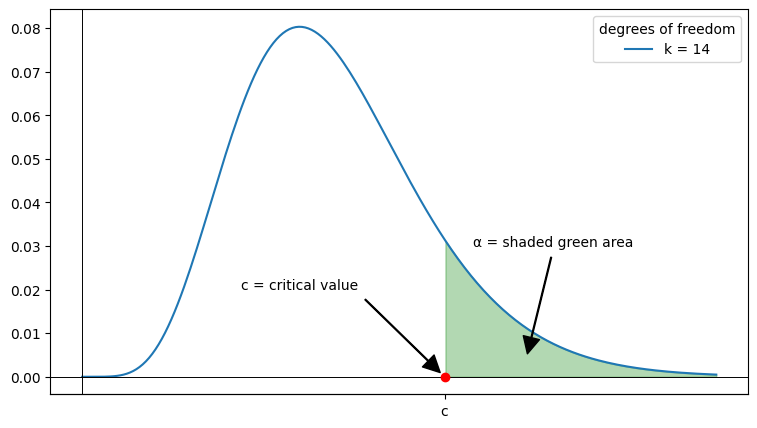

In [14]:
# ------------------------------------------------------------
# Illustration of a right-tail chi-square critical value
# ------------------------------------------------------------
# This code plots the PDF of a chi-square distribution with k=14.
# The green shaded area represents the right-tail probability (α = 0.025),
# and the red dot marks the critical value (c). 
# Annotations label both α and c for clarity. 
# This visual helps students understand the relation between the 
# chi-square value and the corresponding right-tail probability.
# ------------------------------------------------------------


from scipy.stats import chi2  # Import chi-square distribution functions
import matplotlib.pyplot as plt  # Import plotting library
import numpy as np  # Import numerical operations library

k = 14  # Degrees of freedom
dist = chi2(k)  # Create chi-square distribution object
xs = np.linspace(0, 35, 200)  # Generate x-values for plotting the PDF
ys = dist.pdf(xs)  # Compute the PDF values

# Create the figure and axis
fig, ax = plt.subplots(1, 1, figsize=(9,5))

ax.plot(xs, ys, label='k = ' + str(k))  # Plot the chi-square PDF
ax.set_xticks([])  # Remove x-axis ticks for clarity
plt.legend(title='degrees of freedom')  # Add legend for k

# Shade the right-tail area (α) beyond the critical value
ax.fill_between(
        x=xs, 
        y1=ys, 
        where=(20 < xs),  # Right-tail area starting at x=20
        color="green", 
        alpha=0.3)  # Semi-transparent shading

# Draw axes lines for reference
ax.axhline(y=0, color='k', linewidth=0.7)
ax.axvline(x=0, color='k', linewidth=0.7)

ax.plot(20.0, 0, 'ro')  # Mark the critical value c with a red dot

# Annotate the shaded area α
ax.annotate(
    'α = shaded green area', 
    xy=(24.5, 0.004),  # Point to the top of the green area
    xytext=(26, 0.03),  # Position of the text
    horizontalalignment='center',
    arrowprops=dict(facecolor='black', width=0.6, shrink=0.05)
)

# Annotate the critical value c
ax.annotate(
    'c = critical value', 
    xy=(20, 0),  # Location of the red dot
    xytext=(12, 0.02),  # Text positioned above-left
    horizontalalignment='center',
    arrowprops=dict(facecolor='black', width=0.6, shrink=0.05)
)

# Optional: add a secondary x-axis to label the critical value
sec = ax.secondary_xaxis(location=0)
sec.set_xticks([20], labels=['c'])

# Save the figure to file
fig.savefig('img/chi2__arrow_14.png')

# Display the figure
plt.show()


In [15]:
"""
chi2_quantiles.py

Demonstration of computing chi-square critical values (quantiles)
for specified right-tail and left-tail areas using scipy.stats.chi2.
"""

from scipy.stats import chi2

# -------------------------------
# Right-tail example
# -------------------------------
df = 14           # degrees of freedom
alpha_right = 0.025  # right-tail probability

# Compute chi-square value for right-tail area
chi2_right = chi2.ppf(1 - alpha_right, df)
print(f"Right-tail chi-square value (df={df}, alpha={alpha_right}): {chi2_right:.4f}")
# Output: 26.12

# -------------------------------
# Left-tail example
# -------------------------------
alpha_left = 0.975  # left-tail probability

# Compute chi-square value for left-tail area
chi2_left = chi2.ppf(alpha_left, df)
print(f"Left-tail chi-square value (df={df}, alpha={alpha_left}): {chi2_left:.4f}")
# Output: 26.12

# -------------------------------
# Notes
# -------------------------------
# - Right-tail calculation uses 1 - alpha because chi2.ppf computes the lower-tail quantile.
# - Left-tail calculation can be done directly with the cumulative probability.
# - These values are useful for hypothesis testing and constructing chi-square critical regions.


Right-tail chi-square value (df=14, alpha=0.025): 26.1189
Left-tail chi-square value (df=14, alpha=0.975): 26.1189
